In [1]:
from luxai_s2.env import LuxAI_S2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
env = LuxAI_S2() # create the environment object
obs, _ = env.reset(seed=41) # resets an environment with a seed

In [8]:
env.state.board.map.rubble[:, :] = 0 # remove rubble
env.state.board.map.ice[:, :] = 0 # remove ice
env.state.board.map.ore[:, :] = 0 # remove ore


{'player_0': OrderedDict(), 'player_1': OrderedDict()}

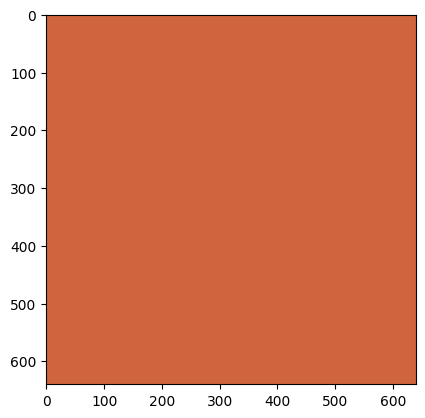

In [9]:
img = env.render("rgb_array", width=640, height=640)
plt.imshow(img)

In [10]:
from lux.kit import obs_to_game_state, GameState, EnvConfig
from luxai_s2.utils import animate
from lux.utils import direction_to, my_turn_to_place_factory

In [35]:
def animate(imgs, _return=True):
    # using cv2 to generate videos as moviepy doesn't work on kaggle notebooks
    import cv2
    import os
    import string
    import random
    video_name = ''.join(random.choice(string.ascii_letters) for i in range(18))+'.webm'
    height, width, layers = imgs[0].shape
    fourcc = cv2.VideoWriter_fourcc(*'VP90')
    video = cv2.VideoWriter(video_name, fourcc, 10, (width,height))

    for img in imgs:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        video.write(img)
    video.release()
    if _return:
        from IPython.display import Video
        return Video(video_name)
def interact(env, agents, steps):
    # reset our env
    obs, _ = env.reset()
    np.random.seed(0)
    env.state.board.map.rubble[:, :] = 0 # remove rubble
    env.state.board.map.ice[:, :] = 0 # remove ice
    env.state.board.map.ore[:, :] = 0 # remove ore
    imgs = []
    step = 0
    # Note that as the environment has two phases, we also keep track a value called 
    # `real_env_steps` in the environment state. The first phase ends once `real_env_steps` is 0 and used below

    # iterate until phase 1 ends
    while env.state.real_env_steps < 0:
        if step >= steps: break
        actions = {}
        for player in env.agents:
            o = obs[player]
            a = agents[player].early_setup(step, o)
            actions[player] = a
        # print(actions)
        step += 1
        obs, rewards, terminations, truncations, infos = env.step(actions)
        imgs += [env.render("rgb_array", width=640, height=640)]
#         print(termination)
        dones = {k: terminations[k] or truncations[k] for k in terminations}
    done = False
    while not done:
        if step >= steps: break
        actions = {}
        for player in env.agents:
            o = obs[player]
            a = agents[player].act(step, o)
            actions[player] = a
        # print(actions)
        step += 1
        for player_id, factories in env.state.factories.items():
            for factory_id, factory in factories.items():
                factory.cargo.water = 10000
        obs, rewards, terminations, truncations, infos = env.step(actions)
        imgs += [env.render("rgb_array", width=640, height=640)]
        dones = {k: terminations[k] or truncations[k] for k in terminations}
        done = dones["player_0"] and dones["player_1"]
    return animate(imgs)

In [36]:
class Agent:
    def __init__(self, player: str, env_cfg: EnvConfig) -> None:
        self.player = player
        self.opp_player = "player_1" if self.player == "player_0" else "player_0"
        self.water_costs = []
        np.random.seed(0)

        self.env_cfg: EnvConfig = env_cfg
    def early_setup(self, step: int, obs, remainingOverageTime: int = 60):
        if step == 0:
            # bid 0 to not waste plans bidding and declare as the default faction
            # you can bid -n to prefer going second or n to prefer going first in placement
            return dict(faction="AlphaStrike", bid=0)
        else:
            if self.player == "player_1" and step == 2:
                spawn_action = {"spawn": (1, 1), "water": 150, "metal": 0}
            elif self.player == "player_0" and step == 1:
                spawn_action = {"spawn": (31, 31), "water": 150, "metal": 0}
            else:
                spawn_action = {}
            return spawn_action
    def act(self, step: int, obs, remainingOverageTime: int = 60):
        actions = dict()
        game_state = obs_to_game_state(step, self.env_cfg, obs)
        for factory_id, factory in game_state.factories[self.player].items():
            self.water_costs.append(factory.water_cost(game_state))
            actions[factory_id] = factory.water()
        return actions

In [37]:
agents = {player: Agent(player, env.state.env_cfg) for player in ["player_0", "player_1"]}
interact(env, agents, 500)

OpenCV: FFMPEG: tag 0x30395056/'VP90' is not supported with codec id 167 and format 'webm / WebM'


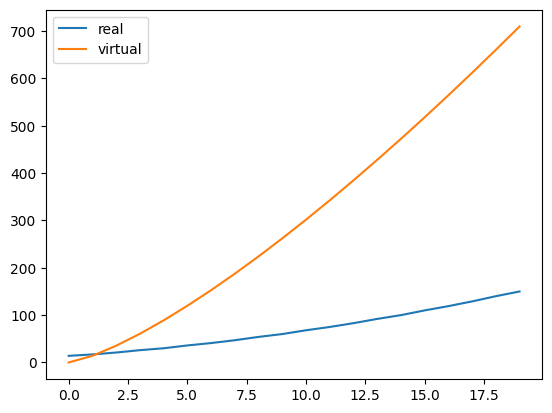

[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0,

In [75]:
water_costs = agents["player_0"].water_costs[1:]
y = np.array(water_costs[::20])[5:]
x = np.arange(len(y))
plt.plot(x, y, label="real")
plt.plot(x, y[0] * np.power(x, 4/3), label="virtual")
plt.legend()
plt.show()
print(water_costs)

In [6]:
# recreate our agents and run
import sys

from importlib import reload
import agent
reload(agent)
Agent = agent.Agent

agents = {player: Agent(player, env.state.env_cfg) for player in env.agents}
interact(env, agents, 30)

/workspaces/LuX-AI-Season-2/.venv/lib/python3.10/site-packages/pygame/sysfont.py:223: UserWarning: 'fc-list' is missing, system fonts cannot be loaded on your platform
  warnings.warn(
OpenCV: FFMPEG: tag 0x30395056/'VP90' is not supported with codec id 167 and format 'webm / WebM'


In [7]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import colorsys
    c = np.array(color) / 255.
    c = colorsys.rgb_to_hls(*c[::-1])
    return np.int16(np.array(colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])[::-1]) * 255)

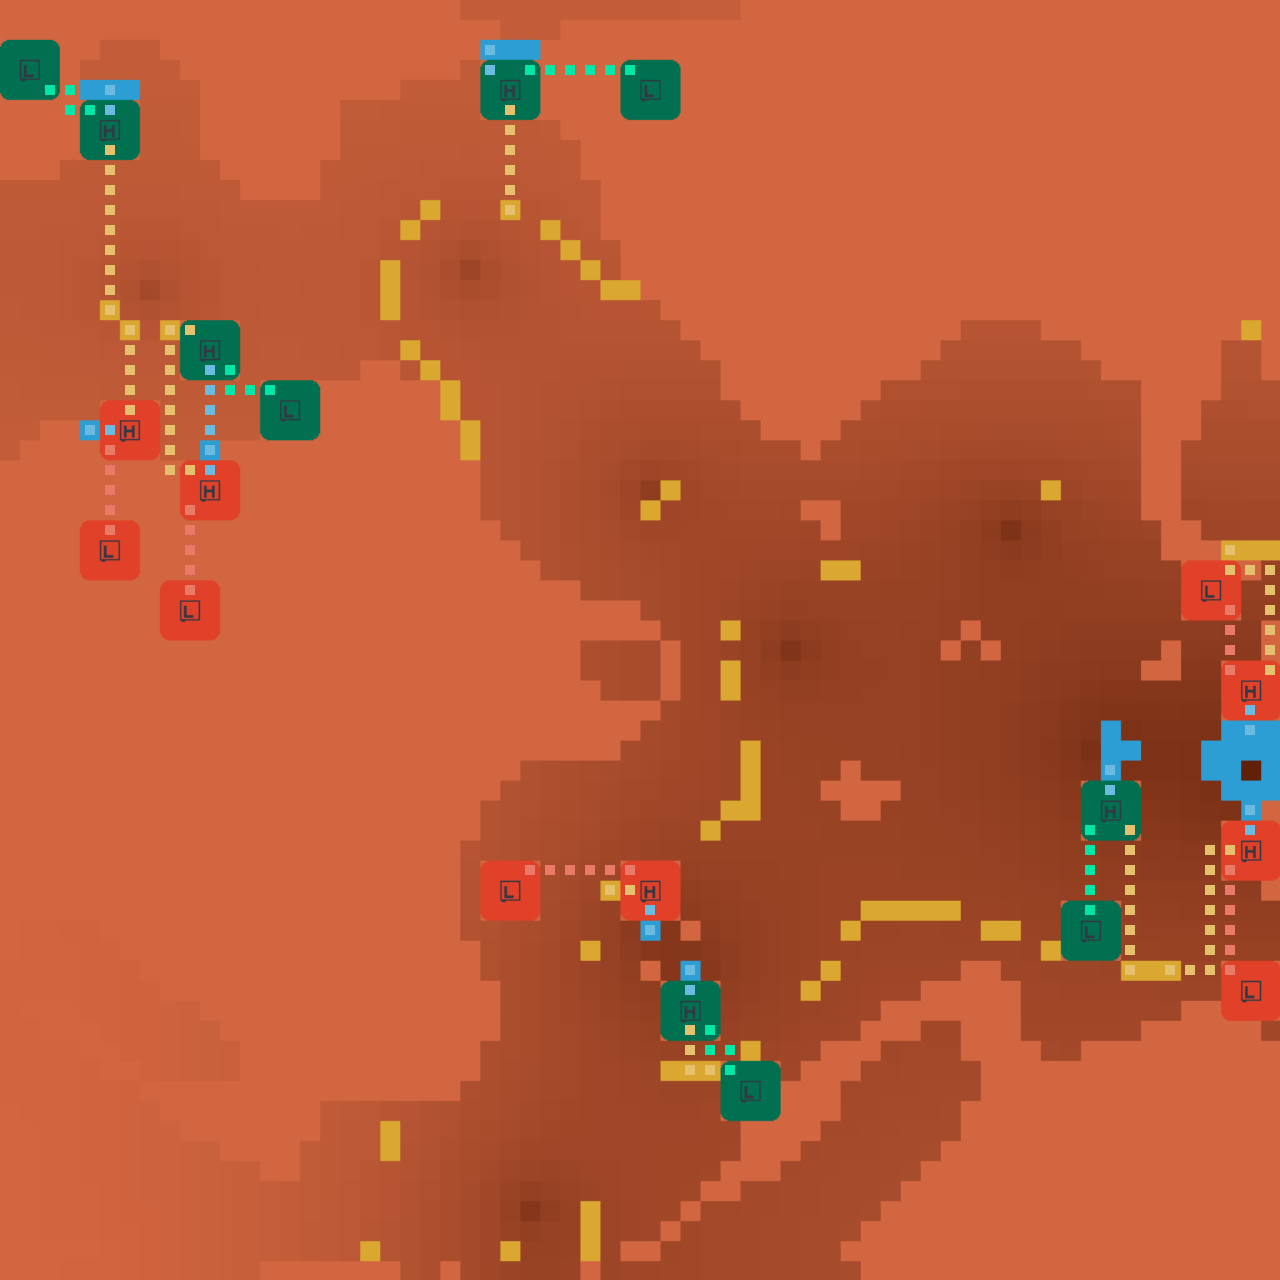

In [8]:
import agent
reload(agent)
agents = {player: agent.Agent(player, env.state.env_cfg) for player in env.agents}
obs, _ = env.reset(549339702)
np.random.seed(0)
imgs = []
step = 0

# Note that as the environment has two phases, we also keep track a value called 
# `real_env_steps` in the environment state. The first phase ends once `real_env_steps` is 0 and used below
team_color = dict(player_0=[224, 65, 40], player_1=[0, 112, 81])
ice_color = [44, 158, 211]
ore_color = [218, 167, 48]
TILE_WIDTH = 20
RECT = slice(TILE_WIDTH//2 - TILE_WIDTH//4, TILE_WIDTH//2 + TILE_WIDTH//4)
# iterate until phase 1 ends
while env.state.real_env_steps < 0:
    actions = {}
    for player in env.agents:
        o = obs[player]
        a = agents[player].early_setup(step, o)
        actions[player] = a
    step += 1
    obs, rewards, terminations, truncations, infos = env.step(actions)
    imgs += [env.render("rgb_array", width=env.env_cfg.map_size * TILE_WIDTH, height=env.env_cfg.map_size * TILE_WIDTH)]
#         print(termination)
    dones = {k: terminations[k] or truncations[k] for k in terminations}
done = False
while not done:
    if env.state.real_env_steps > 0: break
    actions = {}
    for player in env.agents:
        o = obs[player]
        a = agents[player].act(step, o)
        actions[player] = a
    step += 1
    obs, rewards, terminations, truncations, infos = env.step(actions)
    imgs += [env.render("rgb_array", width=env.env_cfg.map_size * TILE_WIDTH, height=env.env_cfg.map_size * TILE_WIDTH)]
    dones = {k: terminations[k] or truncations[k] for k in terminations}
    done = dones["player_0"] and dones["player_1"]
img = imgs[-1]
for player in env.agents:
    ag = agents[player]
    game_state = obs_to_game_state(step, env.state.env_cfg, obs[player])
    factories = game_state.factories[player]
    for factory_id, factory_state in ag.factory_states.items():
        factory = factories[factory_id]
        if factory_state.plans is None:
            continue
        for plan_name, plan in factory_state.plans.items():
            if plan_name == "factory_to_factory":
                color = team_color[player]
            elif plan_name == "ice":
                color = ice_color
            elif plan_name == "ore":
                color = ore_color
            else:
                raise NotImplementedError()
            color = lighten_color(color, 0.7)
            for pos in plan.route.path:
                img[pos[1] * TILE_WIDTH : (pos[1]+1) * TILE_WIDTH, pos[0] * TILE_WIDTH : (pos[0]+1) * TILE_WIDTH][RECT, RECT] = color
plt.imsave("plan.png", img)
from IPython.display import Image
Image("plan.png")